In [1]:
import numpy as np
from matplotlib import pyplot as plt
import heat_transfer_coefficient as htc

# 放射熱伝達率のテスト
## 無限平行面と2次元空間を比較する

In [2]:
# 表面温度の設定
theta_1 = 20.0
theta_2 = 15.0

In [3]:
# 面1の放射率
eps1 = 0.9

# 面2の放射率
eps2 = np.arange(1, 11) / 10.0
print(eps2)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [4]:
# 無限平行平板の場合の有効放射率
infinite_emissivity = htc.effective_emissivity_parallel(eps1, eps2)
print(infinite_emissivity)

[0.0989011  0.19565217 0.29032258 0.38297872 0.47368421 0.5625
 0.64948454 0.73469388 0.81818182 0.9       ]


In [5]:
# 有限平行平板の場合の有効放射率
# 通気層厚さをパラメータに設定する
l_d = np.arange(15, 50) / 1000.0
print(l_d)

# 有効放射率を計算
finete_emissivity = [[htc.effective_emissivity_two_dimension(
    emissivity_1=eps1,
    emissivity_2=eps,
    l_d=l,
    l_s=0.455) for eps in eps2.tolist()] for l in l_d.tolist()]

[0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024 0.025 0.026
 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036 0.037 0.038
 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048 0.049]


In [6]:
# 放射熱伝達率の計算
infinite_rad_heat_transfer = [htc.radiative_heat_transfer_coefficient_detailed(
    theta_1=theta_1,
    theta_2=theta_2,
    effective_emissivity=emissivity) for emissivity in infinite_emissivity]
print(infinite_rad_heat_transfer)

finite_rad_heat_transfer = (htc.radiative_heat_transfer_coefficient_detailed(
    theta_1=theta_1,
    theta_2=theta_2,
    effective_emissivity=np.array(finete_emissivity)))

[0.5507508159192807, 1.089528788014229, 1.6167201370533721, 2.1326946488789162, 2.6378065394028702, 3.1323952655409086, 3.616786285985379, 4.091291775400371, 4.55621129533223, 5.011832424865453]


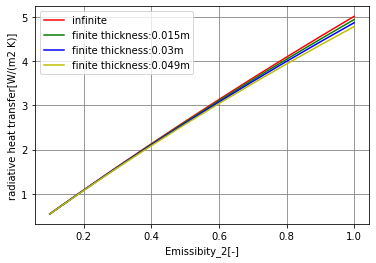

In [7]:
# グラフの描画（放射率別）
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.set_xlabel('Emissibity_2[-]')
ax1.set_ylabel('radiative heat transfer[W/(m2 K)]')

plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='gray', linestyle='-')

plt.plot(eps2, infinite_rad_heat_transfer,linestyle='solid',
         color='r', label='infinite')
plt.plot(eps2, finite_rad_heat_transfer[0,:],linestyle='solid',
         color='g', label='finite thickness:0.015m')
plt.plot(eps2, finite_rad_heat_transfer[15,:],linestyle='solid',
         color='b', label='finite thickness:0.03m')
plt.plot(eps2, finite_rad_heat_transfer[34,:],linestyle='solid',
         color='y', label='finite thickness:0.049m')

plt.legend()
plt.show()

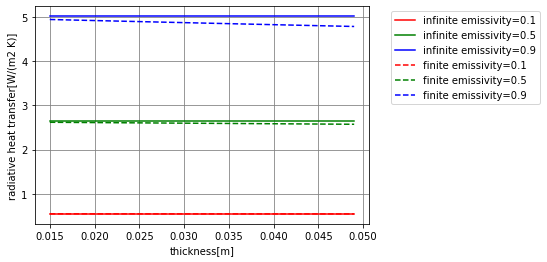

In [8]:
# グラフの描画（中空層厚さ別）
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.set_xlabel('thickness[m]')
ax1.set_ylabel('radiative heat transfer[W/(m2 K)]')

plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='gray', linestyle='-')

plt.plot(l_d, np.full(35,infinite_rad_heat_transfer[0]),linestyle='solid',
         color='r', label='infinite emissivity=0.1')
plt.plot(l_d, np.full(35,infinite_rad_heat_transfer[4]),linestyle='solid',
         color='g', label='infinite emissivity=0.5')
plt.plot(l_d, np.full(35,infinite_rad_heat_transfer[9]),linestyle='solid',
         color='b', label='infinite emissivity=0.9')
plt.plot(l_d, finite_rad_heat_transfer[:,0],linestyle='dashed',
         color='r', label='finite emissivity=0.1')
plt.plot(l_d, finite_rad_heat_transfer[:,4],linestyle='dashed',
         color='g', label='finite emissivity=0.5')
plt.plot(l_d, finite_rad_heat_transfer[:,9],linestyle='dashed',
         color='b', label='finite emissivity=0.9')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()